In [2]:
from google.colab import drive
drive.mount('/content/drive')

dataset_path = '/content/drive/My Drive/Dataset'

Mounted at /content/drive


In [3]:
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras import layers, models
import matplotlib.pyplot as plt

In [4]:
image_size = (256, 256)
batch_size = 32

train_datagen = ImageDataGenerator(
    rescale=1.0/255,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    validation_split=0.2
)

train_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='training'
)
validation_generator = train_datagen.flow_from_directory(
    dataset_path,
    target_size=image_size,
    batch_size=batch_size,
    class_mode='categorical',
    subset='validation'
)

Found 1031 images belonging to 7 classes.
Found 253 images belonging to 7 classes.


In [5]:
model = models.Sequential([
    layers.Conv2D(32, (3, 3), activation='relu', input_shape=(256, 256, 3)),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(64, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Conv2D(128, (3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    layers.Flatten(),
    layers.Dense(128, activation='relu'),
    layers.Dense(train_generator.num_classes, activation='softmax')
])

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 28, 28, 128)         │         147,584 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_3 (MaxPooling2D)       │ (None, 14, 14, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 25088)               │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 128)                 │       3,211,392 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 7)                   │             903 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 3,453,127 (13.17 MB)

 Trainable params: 3,453,127 (13.17 MB)

 Non-trainable params: 0 (0.00 B)

In [6]:
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [7]:
history = model.fit(
    train_generator,
    epochs=70,
    validation_data=validation_generator
)

Epoch 1/70


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:122: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


33/33 ━━━━━━━━━━━━━━━━━━━━ 351s 9s/step - accuracy: 0.2073 - loss: 1.9367 - val_accuracy: 0.3162 - val_loss: 1.5904
Epoch 2/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 231s 6s/step - accuracy: 0.3155 - loss: 1.6294 - val_accuracy: 0.4032 - val_loss: 1.4402
Epoch 3/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 193s 6s/step - accuracy: 0.4263 - loss: 1.3784 - val_accuracy: 0.4743 - val_loss: 1.3992
Epoch 4/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 191s 6s/step - accuracy: 0.5114 - loss: 1.3327 - val_accuracy: 0.5415 - val_loss: 1.3214
Epoch 5/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 196s 6s/step - accuracy: 0.5173 - loss: 1.2821 - val_accuracy: 0.5336 - val_loss: 1.2322
Epoch 6/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 189s 5s/step - accuracy: 0.5949 - loss: 1.0729 - val_accuracy: 0.5771 - val_loss: 1.1195
Epoch 7/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 194s 6s/step - accuracy: 0.5853 - loss: 1.0689 - val_accuracy: 0.5968 - val_loss: 1.0262
Epoch 8/70
33/33 ━━━━━━━━━━━━━━━━━━━━ 199s 6s/step - accuracy: 0.6882 - loss: 0.8900 - val_accuracy: 0.6245 - val_loss: 0.

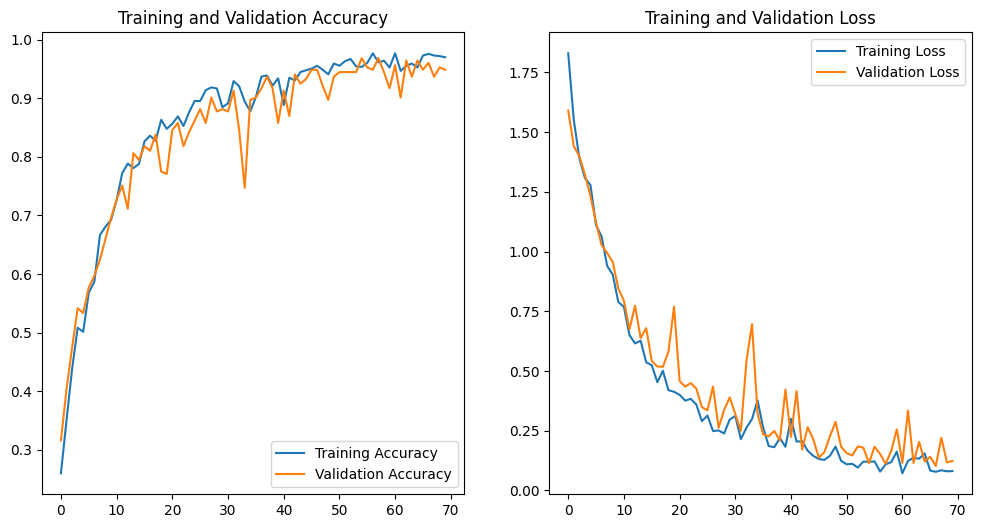

In [8]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs_range = range(len(acc))

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.plot(epochs_range, acc, label='Training Accuracy')
plt.plot(epochs_range, val_acc, label='Validation Accuracy')
plt.legend(loc='lower right')
plt.title('Training and Validation Accuracy')

plt.subplot(1, 2, 2)
plt.plot(epochs_range, loss, label='Training Loss')
plt.plot(epochs_range, val_loss, label='Validation Loss')
plt.legend(loc='upper right')
plt.title('Training and Validation Loss')
plt.show()

In [9]:
validation_loss, validation_accuracy = model.evaluate(validation_generator)
print(f'Validation loss: {validation_loss}')
print(f'Validation accuracy: {validation_accuracy}')

8/8 ━━━━━━━━━━━━━━━━━━━━ 17s 2s/step - accuracy: 0.9658 - loss: 0.1210
Validation loss: 0.11040181666612625
Validation accuracy: 0.9644268751144409
